In [11]:
import torch
import numpy as np
import pandas as pd
import scanpy as sc
from typing import Tuple

# scVI imports
import scvi
from scvi.model.utils import mde
import pymde

torch.manual_seed(0)
np.random.seed(0)

In [13]:
adatas = []
adatas.append(sc.read_h5ad('../../../oscb/user_storage/Benchmarks/droplet-Bladder_1752371582318/QC/droplet_Bladder_Seurat.h5ad'))
adatas.append(sc.read_h5ad('../../../oscb/user_storage/Benchmarks/facs-Bladder_1752355559732/QC/facs_Bladder_Seurat.h5ad'))

adata = sc.concat(adatas, join='outer')
adata

AnnData object with n_obs × n_vars = 3678 × 3427
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain', 'split_idx', '_scvi_batch', '_scvi_labels', 'leiden_X_scVI', 'louvain_X_scVI', 'nReads', 'plate.barcode', 'FACS.selection'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_tsne', 'X_tsne_3D', 'X_umap', 'X_umap_3D'
    layers: 'raw_counts', 'scale.data', 'scvi_normalized'

In [36]:
adata_int = sc.read_h5ad('../../../oscb/user_storage/Benchmarks/droplet-Bladder_1752371582318/QC/integration/24aec6c06afdea5190e24995ed7ed27e/integration/3f2f0c98ec84217be8d360c984838441/SCVI_integration.h5ad')
adata_int

AnnData object with n_obs × n_vars = 3656 × 3410
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain', 'split_idx', '_scvi_batch', '_scvi_labels', 'leiden_X_scVI', 'louvain_X_scVI', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'outlier', 'mt_outlier', 'doublet_scores', 'predicted_doublets', 'clf_doublet', 'clf_score', 'nReads', 'plate.barcode', 'FACS.selection', 'sample', 'replica

In [37]:
adata = adata_int.copy()
adata.X = adata.layers['raw_counts']

In [38]:
from scib.metrics import metrics

In [100]:
metrics_all = metrics(adata, adata_int, batch_key='orig.ident', label_key='cell_ontology_class', cluster_nmi=None, ari_=True, nmi_=True, nmi_method='arithmetic', nmi_dir=None, silhouette_=True, si_metric='euclidean', pcr_=True, cell_cycle_=True, organism='mouse', hvg_score_=True, isolated_labels_=True, isolated_labels_f1_=True, isolated_labels_asw_=True, n_isolated=True, graph_conn_=True, trajectory_=False, kBET_=True, lisi_graph_=False, ilisi_=False, clisi_=True)

/usr/local/lib/python3.8/dist-packages/scib/metrics/metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:453: PendingDeprecationWarning: The dtype argument will be deprecated in anndata 0.10.0
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:453: PendingDeprecationWarning: The dtype argument will be deprecated in anndata 0.10.0
  warnings.warn(


Variance contribution increased after integration!
Setting PCR comparison score to 0.
cell cycle effect...


/usr/local/lib/python3.8/dist-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:453: PendingDeprecationWarning: The dtype argument will be deprecated in anndata 0.10.0
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:453: PendingDeprecationWarning: The dtype argument will be deprecated in anndata 0.10.0
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:453: PendingDeprecationWarning: The dtype argument will be deprecated in anndata 0.10.0
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:453: Pe

Isolated labels F1...
Compute neighbors on rep X_pca
Compute neighbors on rep X_pca
Isolated labels ASW...
Graph connectivity...
kBET...


/usr/local/lib/python3.8/dist-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/usr/local/lib/python3.8/dist-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


leukocyte consists of a single batch or is too small. Skip.
endothelial cell consists of a single batch or is too small. Skip.
cLISI score...


/usr/local/lib/python3.8/dist-packages/scib/metrics/lisi.py:175: UserWarning: 'batch_key' is deprecated and will be ignore
  warnings.warn("'batch_key' is deprecated and will be ignore", stacklevel=1)
/usr/local/lib/python3.8/dist-packages/scib/knn_graph/knn_graph.o: /usr/lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.8/dist-packages/scib/knn_graph/knn_graph.o)
/usr/local/lib/python3.8/dist-packages/scib/knn_graph/knn_graph.o: /usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /usr/local/lib/python3.8/dist-packages/scib/knn_graph/knn_graph.o)


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/lisi_isq6mybk/graph_lisi_indices_0.txt'

In [93]:
adata.obs['orig.ident'].unique()

['10X', 'Bladder']
Categories (2, object): ['10X', 'Bladder']

In [95]:
for sample in adata.obs['orig.ident'].unique():
    adata_sub = adata[adata.obs['orig.ident']==sample, :]
    print(adata_sub)

View of AnnData object with n_obs × n_vars = 2290 × 3410
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain', 'split_idx', '_scvi_batch', '_scvi_labels', 'leiden_X_scVI', 'louvain_X_scVI', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'outlier', 'mt_outlier', 'doublet_scores', 'predicted_doublets', 'clf_doublet', 'clf_score', 'nReads', 'plate.barcode', 'FACS.selection', 'sample', 

In [97]:
adata_sub.obs

,orig.ident,n_counts,n_genes,channel,tissue,subtissue,mouse.sex,mouse.id,percent.ercc,percent.ribo,...,predicted_doublets,clf_doublet,clf_score,nReads,plate.barcode,FACS.selection,sample,replicate,leiden_X_pca_harmony,louvain_X_pca_harmony
A1.D042253.3_9_M.1.1,Bladder,51411.0,528,NaN,Bladder,,M,3_9_M,0.008160,0.013950,...,False,0.0,1.513148,330249.0,D042253,Multiple,Bladder_1,1,2,5
A1.MAA000487.3_10_M.1.1,Bladder,159625.0,519,NaN,Bladder,,M,3_10_M,0.008692,0.024045,...,False,0.0,0.013162,748761.0,MAA000487,Multiple,Bladder_1,1,0,1
A10.B002771.3_39_F.1.1,Bladder,147336.0,346,NaN,Bladder,,F,3_39_F,0.013280,0.060644,...,False,0.0,0.000027,947995.0,B002771,Multiple,Bladder_1,1,1,2
A10.MAA000487.3_10_M.1.1,Bladder,69895.0,507,NaN,Bladder,,M,3_10_M,0.006185,0.042786,...,False,0.0,0.001155,543127.0,MAA000487,Multiple,Bladder_1,1,3,2
A11.MAA000487.3_10_M.1.1,Bladder,145881.0,545,NaN,Bladder,,M,3_10_M,0.003070,0.030899,...,False,0.0,0.222866,737849.0,MAA000487,Multiple,Bladder_1,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P4.D042253.3_9_M.1.1,Bladder,53898.0,414,NaN,Bladder,,M,3_9_M,0.011340,0.011561,...,False,0.0,0.038979,396498.0,D042253,Multiple,Bladder_3,3,2,5
P6.D041914.3_8_M.1.1,Bladder,27374.0,560,NaN,Bladder,,M,3_8_M,0.011700,0.024243,...,False,0.0,1.051450,244193.0,D041914,Multiple,Bladder_3,3,2,3
P6.D042253.3_9_M.1.1,Bladder,73547.0,522,NaN,Bladder,,M,3_9_M,0.008608,0.019791,...,False,0.0,0.006566,494203.0,D042253,Multiple,Bladder_3,3,2,3
P7.B002764.3_38_F.1.1,Bladder,1111859.0,414,NaN,Bladder,,F,3_38_F,0.011619,0.037743,...,False,0.0,0.000018,3627019.0,B002764,Multiple,Bladder_3,3,0,1


In [90]:
adata

AnnData object with n_obs × n_vars = 3656 × 3410
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain', 'split_idx', '_scvi_batch', '_scvi_labels', 'leiden_X_scVI', 'louvain_X_scVI', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'outlier', 'mt_outlier', 'doublet_scores', 'predicted_doublets', 'clf_doublet', 'clf_score', 'nReads', 'plate.barcode', 'FACS.selection', 'sample', 'replica

In [101]:
metrics_all

,0
NMI_cluster/label,0.733732
ARI_cluster/label,0.695716
ASW_label,0.636412
ASW_label/batch,0.776834
PCR_batch,0.000000
cell_cycle_conservation,0.000000
isolated_label_F1,0.990385
isolated_label_silhouette,0.518632
graph_conn,1.000000
kBET,0.010634


In [105]:
biological_conservation_metrics = ['NMI_cluster/label', 'ARI_cluster/label', 'ASW_label', 'cell_cycle_conservation','isolated_label_F1', 'isolated_label_silhouette', 'hvg_overlap']
metrics_dict = metrics_all.dropna().to_dict()[0]

In [106]:
metrics_dict

{'NMI_cluster/label': 0.7337318872366533,
 'ARI_cluster/label': 0.6957164819522421,
 'ASW_label': 0.636411651968956,
 'ASW_label/batch': 0.7768342660288765,
 'PCR_batch': 0.0,
 'cell_cycle_conservation': 0.0,
 'isolated_label_F1': 0.9903846153846154,
 'isolated_label_silhouette': 0.5186320182401687,
 'graph_conn': 1.0,
 'kBET': 0.010634475729392356,
 'hvg_overlap': 0.221}

In [107]:
for key, value in metrics_dict.items():
    metrics_dict[key] = float('{:.4f}'.format(value))
metrics_dict

{'NMI_cluster/label': 0.7337,
 'ARI_cluster/label': 0.6957,
 'ASW_label': 0.6364,
 'ASW_label/batch': 0.7768,
 'PCR_batch': 0.0,
 'cell_cycle_conservation': 0.0,
 'isolated_label_F1': 0.9904,
 'isolated_label_silhouette': 0.5186,
 'graph_conn': 1.0,
 'kBET': 0.0106,
 'hvg_overlap': 0.221}

In [56]:
metrics_dict['NMI_cluster/label']

0.7337318872366533

In [62]:
bc_total = 0
for key in biological_conservation_metrics:
    bc_total += metrics_dict[key]
biological_conservation_score = bc_total/len(biological_conservation_metrics)

biological_conservation_score

0.5422680935403765

In [82]:
dict1 = {
        "sys_info": 1,
        "benchmarksId": 2,
        "datasetId": 3,
        "task_type": 4,
        "tool": "scVI"
        }

In [83]:
res = {**dict1, **metrics_dict}
res

{'sys_info': 1,
 'benchmarksId': 2,
 'datasetId': 3,
 'task_type': 4,
 'tool': 'scVI',
 'NMI_cluster/label': 0.7337318872366533,
 'ARI_cluster/label': 0.6957164819522421,
 'ASW_label': 0.636411651968956,
 'ASW_label/batch': 0.7768342660288765,
 'PCR_batch': 0.0,
 'cell_cycle_conservation': 0.0,
 'isolated_label_F1': 0.9903846153846154,
 'isolated_label_silhouette': 0.5186320182401687,
 'graph_conn': 1.0,
 'kBET': 0.010634475729392356,
 'hvg_overlap': 0.221}

In [79]:
metrics_dict

In [46]:
metrics_all.to_dict()[0]

{'NMI_cluster/label': 0.7337318872366533,
 'ARI_cluster/label': 0.6957164819522421,
 'ASW_label': 0.636411651968956,
 'ASW_label/batch': 0.7768342660288765,
 'PCR_batch': 0.0,
 'cell_cycle_conservation': 0.0,
 'isolated_label_F1': 0.9903846153846154,
 'isolated_label_silhouette': 0.5186320182401687,
 'graph_conn': 1.0,
 'kBET': 0.010634475729392356,
 'iLISI': nan,
 'cLISI': nan,
 'hvg_overlap': 0.221,
 'trajectory': nan}

In [42]:
type(metrics_all)

pandas.core.frame.DataFrame

In [4]:
adata.X

array([[-0.47669256, -0.26758417, -0.3114305 , ..., -0.22615238,
         1.979075  , -0.3112383 ],
       [-0.47669256, -0.26758417, -0.3114305 , ..., -0.22615238,
         2.7118683 , -0.3112383 ],
       [-0.47669256, -0.26758417, -0.3114305 , ..., -0.22615238,
        -0.38299   , -0.3112383 ],
       ...,
       [ 3.4184117 ,  0.9468652 , -0.3114305 , ..., -0.22615238,
        -0.38299   ,  6.7855124 ],
       [-0.47669256, -0.26758417,  2.6127756 , ..., -0.22615238,
        -0.38299   , -0.3112383 ],
       [ 2.6438909 ,  0.07179493,  0.26107118, ..., -0.22615238,
        -0.38299   ,  2.7979238 ]], dtype=float32)

In [10]:
adata.obsm['X_scVI'].shape

(3656, 50)

In [8]:
adata.layers["normalized_X"].todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.60286325,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.81074363,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [3]:
adata = sc.read_h5ad('../../../oscb/user_storage/Benchmarks/droplet-Bladder_1751939818861/QC/integration/HARMONY_integration.h5ad')
adata

AnnData object with n_obs × n_vars = 3878 × 3427
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain', 'nReads', 'plate.barcode', 'FACS.selection', 'leiden_X_pca_harmony', 'louvain_X_pca_harmony'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_tsne_3D', 'X_umap', 'X_umap_3D'
    varm: 'PCs'
    layers: 'raw_counts', 'scale.data'
    obsp: 'connectivities', 'distances'

In [4]:
adata = sc.read_h5ad('../../../oscb/user_storage/Benchmarks/droplet-Bladder_1751939818861/QC/droplet_Bladder_Seurat.h5ad')
adata

AnnData object with n_obs × n_vars = 2500 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'channel', 'tissue', 'subtissue', 'mouse.sex', 'mouse.id', 'percent.ercc', 'percent.ribo', 'free_annotation', 'cell_ontology_class', 'res.0.4', 'previous_free_annotation', 'previous_cell_ontology_class', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'highly_variable'
    uns: 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    varm: 'PCs'
    layers: 'raw_counts', 'scale.data'
    obsp: 'connectivities', 'distances'

In [5]:
adata = sc.read_h5ad('../../../oscb/user_storage/Benchmarks/facs-Bladder_1751990659889/QC/facs_Bladder_Seurat.h5ad')
adata

AnnData object with n_obs × n_vars = 1378 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'nReads', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'percent.ercc', 'free_annotation', 'cell_ontology_class', 'percent.ribo', 'res.0.4', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'highly_variable'
    uns: 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_tsne_3D', 'X_umap', 'X_umap_3D'
    varm: 'PCs'
    layers: 'raw_counts', 'scale.data'
    obsp: 'connectivities', 'distances'

In [22]:
sample='normal bladder'
adata.obs['sample'] = sample
adata.obs['batch'] = sample
adata.obs.insert(loc=0, column='sample', value=adata.obs.pop('sample'))
adata.obs.insert(loc=1, column='batch', value=adata.obs.pop('batch'))

In [4]:
adata.obs

,sample,batch,orig.ident,n_counts,n_genes,channel,tissue,subtissue,mouse.sex,mouse.id,percent.ercc,percent.ribo,free_annotation,cell_ontology_class,res.0.4,previous_free_annotation,previous_cell_ontology_class,cluster.ids,cell_ontology_id
10X_P4_3_AAAGTAGAGATGCCAG,Droplet bladder,Droplet bladder,10X,10291.0,2853,10X_P4_3,Bladder,,M,3-M-8,0.0,0.219609,Bladder mesenchymal cell,bladder cell,0,NA,NA,0,CL:1001319
10X_P4_3_AACCGCGTCCAACCAA,Droplet bladder,Droplet bladder,10X,17520.0,4194,10X_P4_3,Bladder,,M,3-M-8,0.0,0.176712,Bladder mesenchymal cell,bladder cell,2,NA,NA,2,CL:1001319
10X_P4_3_AACTCCCGTCGGGTCT,Droplet bladder,Droplet bladder,10X,12944.0,3347,10X_P4_3,Bladder,,M,3-M-8,0.0,0.192444,Bladder mesenchymal cell,bladder cell,5,NA,NA,5,CL:1001319
10X_P4_3_AACTCTTAGTTGCAGG,Droplet bladder,Droplet bladder,10X,19594.0,3851,10X_P4_3,Bladder,,M,3-M-8,0.0,0.356385,Luminal bladder epithelial cell,bladder urothelial cell,3,NA,NA,3,CL:1001428
10X_P4_3_AACTCTTTCATAACCG,Droplet bladder,Droplet bladder,10X,14594.0,3809,10X_P4_3,Bladder,,M,3-M-8,0.0,0.157119,Bladder mesenchymal cell,bladder cell,2,NA,NA,2,CL:1001319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P7_7_TTGTAGGTCATGTAGC,Droplet bladder,Droplet bladder,10X,22993.0,4296,10X_P7_7,Bladder,,F,3-F-56,0.0,0.286783,Basal bladder epithelial cell,bladder urothelial cell,1,NA,NA,1,CL:1001428
10X_P7_7_TTTACTGGTGTTGAGG,Droplet bladder,Droplet bladder,10X,8753.0,3005,10X_P7_7,Bladder,,F,3-F-56,0.0,0.120873,Bladder mesenchymal cell,bladder cell,5,NA,NA,5,CL:1001319
10X_P7_7_TTTCCTCCATACCATG,Droplet bladder,Droplet bladder,10X,14665.0,3778,10X_P7_7,Bladder,,F,3-F-56,0.0,0.118173,Bladder mesenchymal cell,bladder cell,5,NA,NA,5,CL:1001319
10X_P7_7_TTTGTCAGTTACCGAT,Droplet bladder,Droplet bladder,10X,30363.0,4786,10X_P7_7,Bladder,,F,3-F-56,0.0,0.307018,Basal bladder epithelial cell,bladder urothelial cell,1,NA,NA,1,CL:1001428


In [9]:
adata.X.todense()

matrix([[ 36., 546.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ..., 173.,   0.,   0.],
        ...,
        [  0.,   0., 176., ...,   8.,   0.,   0.],
        [  0.,   0.,   0., ...,  32.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [11]:
adata = adata[adata.obs.doublet_class=="Singlet", :]
adata

View of AnnData object with n_obs × n_vars = 1268 × 23341
    obs: 'orig.ident', 'n_counts', 'n_genes', 'nReads', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'percent.ercc', 'free_annotation', 'cell_ontology_class', 'percent.ribo', 'res.0.4', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'highly_variable'
    uns: 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    varm: 'PCs'
    layers: 'raw_counts', 'scale.data'
    obsp: 'connectivities', 'distances'

In [12]:
adata.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,highly_variable
0610005C13Rik,0.031205,0.813114,0.529870,1.045566,False
0610007C21Rik,150.334543,66289.819009,75107.994322,0.882593,False
0610007L01Rik,58.607402,34032.841398,18251.661060,1.793859,True
0610007N19Rik,33.635704,6287.460511,8654.141790,0.726526,False
0610007P08Rik,15.658926,10390.756496,3189.146789,1.708936,True
...,...,...,...,...,...
Zzef1,17.420174,6078.171183,3657.869317,1.661670,True
Zzz3,21.474601,3257.221214,4802.421678,0.678246,False
a,0.009434,0.064544,0.057357,1.125313,False
l7Rn6,29.444122,8880.380681,7260.232790,1.223154,False


In [13]:
adata = adata[:, adata.var.highly_variable] 
adata

View of AnnData object with n_obs × n_vars = 1268 × 2000
    obs: 'orig.ident', 'n_counts', 'n_genes', 'nReads', 'plate.barcode', 'mouse.id', 'tissue', 'subtissue', 'FACS.selection', 'mouse.sex', 'percent.ercc', 'free_annotation', 'cell_ontology_class', 'percent.ribo', 'res.0.4', 'cluster.ids', 'cell_ontology_id', 'pct_counts_mt', 'pct_counts_rb', 'pct_counts_hb', 'percent.plat', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_score', 'doublet_class', 'leiden', 'louvain'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'highly_variable'
    uns: 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_umap_3D'
    varm: 'PCs'
    layers: 'raw_counts', 'scale.data'
    obsp: 'connectivities', 'distances'

In [9]:
adata.obs

,orig.ident,n_counts,n_genes,nReads,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,...,pct_counts_mt,pct_counts_rb,pct_counts_hb,percent.plat,RNA_snn_res.0.5,seurat_clusters,doublet_score,doublet_class,leiden,louvain
A1.B000610.3_56_F.1.1,Bladder,610727.0,2569,610727.0,B000610,3_56_F,Bladder,,Multiple,F,...,0.0,0.0,0.0,0.0,0,0,0.096970,Singlet,1,5
A1.B002764.3_38_F.1.1,Bladder,320035.0,578,320035.0,B002764,3_38_F,Bladder,,Multiple,F,...,0.0,0.0,0.0,0.0,4,4,0.078788,Singlet,3,2
A1.B002771.3_39_F.1.1,Bladder,1044981.0,3998,1044981.0,B002771,3_39_F,Bladder,,Multiple,F,...,0.0,0.0,0.0,0.0,0,0,0.109091,Singlet,1,5
A1.D041914.3_8_M.1.1,Bladder,447232.0,3401,447232.0,D041914,3_8_M,Bladder,,Multiple,M,...,0.0,0.0,0.0,0.0,0,0,0.096970,Singlet,0,5
A1.D042253.3_9_M.1.1,Bladder,330249.0,4439,330249.0,D042253,3_9_M,Bladder,,Multiple,M,...,0.0,0.0,0.0,0.0,0,0,0.133333,Singlet,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8.MAA000487.3_10_M.1.1,Bladder,1668602.0,6249,1668602.0,MAA000487,3_10_M,Bladder,,Multiple,M,...,0.0,0.0,0.0,0.0,1,1,0.157576,Singlet,2,1
P9.B000610.3_56_F.1.1,Bladder,865291.0,4739,865291.0,B000610,3_56_F,Bladder,,Multiple,F,...,0.0,0.0,0.0,0.0,4,4,0.206061,Singlet,3,2
P9.B002771.3_39_F.1.1,Bladder,1056676.0,5448,1056676.0,B002771,3_39_F,Bladder,,Multiple,F,...,0.0,0.0,0.0,0.0,1,1,0.242424,Singlet,2,3
P9.D042253.3_9_M.1.1,Bladder,493818.0,5148,493818.0,D042253,3_9_M,Bladder,,Multiple,M,...,0.0,0.0,0.0,0.0,3,3,0.181818,Singlet,0,4


In [5]:
def clean_anndata(adata):
    # Scanpy
    if 'outlier' in adata.obs.columns and 'mt_outlier' in adata.obs.columns:
        adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()
    if 'predicted_doublets' in adata.obs.columns:
        adata = adata[adata.obs.predicted_doublets=="False", :]

    # Bioconductor
    if 'discard' in adata.obs.columns:
        adata=adata[adata.obs.discard=="False", :]
    if 'discard' in adata.var.columns:
        adata = adata[:, ~adata.var.discard]

    # Seurat
    if 'doublet_class' in adata.obs.columns:
        adata = adata[adata.obs.doublet_class=="Singlet", :]

    if 'highly_variable' in adata.var.columns:
        adata = adata[:, adata.var.highly_variable] 

In [6]:
adata = clean_anndata(adata)
adata

In [7]:
adata

In [2]:
scvi.model.SCVI.setup_anndata(adata)
model = scvi.model.SCVI(adata, n_hidden = 192, n_latent = 50, n_layers = 1, gene_likelihood = 'zinb')
model.train(max_epochs = 400, early_stopping = True)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/usr/local/lib/python3.8/dist-packages/scvi/data/_utils.py:119: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 188/400:  47%|███████████████████████████████████████████████████▏                                                         | 188/400 [01:02<01:10,  3.02it/s, loss=2.89e+04, v_num=1]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 30008.531. Signaling Trainer to stop.


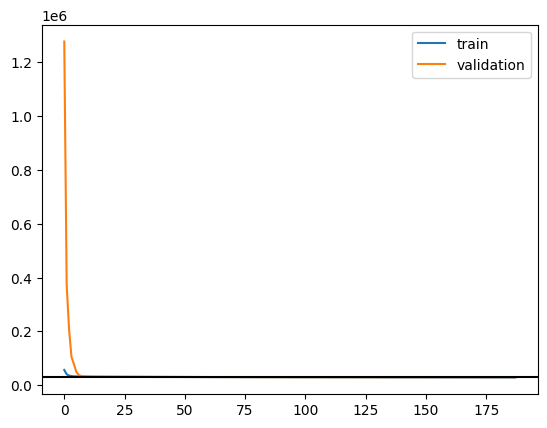

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

y = model.history['reconstruction_loss_validation']['reconstruction_loss_validation'].min()
plt.plot(model.history['reconstruction_loss_train']['reconstruction_loss_train'], label='train')
plt.plot(model.history['reconstruction_loss_validation']['reconstruction_loss_validation'], label='validation')

plt.axhline(y, c = 'k')

plt.legend()
plt.show()

In [2]:
import doubletdetection
from scipy.stats import median_abs_deviation as mad

In [6]:
def run_doubletdetection(adata):
    import doubletdetection

    clf = doubletdetection.BoostClassifier(
    n_iters=10,
    clustering_algorithm="louvain",
    standard_scaling=True,
    pseudocount=0.1,
    n_jobs=-1)
    doublets = clf.fit(adata.X).predict(p_thresh=1e-3, voter_thresh=0.5)
    doublet_score = clf.doublet_score()

    adata.obs["clf_doublet"] = doublets
    adata.obs["clf_score"] = doublet_score

    return adata

In [7]:
adata = run_doubletdetection(adata)
adata.obs

  0%|          | 0/10 [00:00<?, ?it/s]

,orig.ident,n_counts,n_genes,nReads,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,...,RNA_snn_res.0.5,seurat_clusters,doublet_score,doublet_class,leiden,louvain,MAGIC_leiden,MAGIC_louvain,clf_doublet,clf_score
A1.B000610.3_56_F.1.1,Bladder,119565.0,364,610727.0,B000610,3_56_F,Bladder,,Multiple,F,...,0,0,0.060606,Singlet,1,5,11,7,0.0,0.000242
A1.B002764.3_38_F.1.1,Bladder,3184.0,90,320035.0,B002764,3_38_F,Bladder,,Multiple,F,...,4,4,0.090909,Singlet,3,2,24,3,0.0,0.165940
A1.B002771.3_39_F.1.1,Bladder,197586.0,489,1044981.0,B002771,3_39_F,Bladder,,Multiple,F,...,0,0,0.066667,Singlet,1,5,14,4,0.0,0.000296
A1.D041914.3_8_M.1.1,Bladder,70714.0,405,447232.0,D041914,3_8_M,Bladder,,Multiple,M,...,0,0,0.030303,Singlet,0,5,1,5,0.0,0.020139
A1.D042253.3_9_M.1.1,Bladder,51411.0,528,330249.0,D042253,3_9_M,Bladder,,Multiple,M,...,0,0,0.115152,Singlet,1,0,6,6,0.0,0.111427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8.MAA000487.3_10_M.1.1,Bladder,269238.0,637,1668602.0,MAA000487,3_10_M,Bladder,,Multiple,M,...,1,1,0.121212,Singlet,2,1,7,15,0.0,0.008221
P9.B000610.3_56_F.1.1,Bladder,121666.0,522,865291.0,B000610,3_56_F,Bladder,,Multiple,F,...,4,4,0.139394,Singlet,3,2,3,0,0.0,0.017267
P9.B002771.3_39_F.1.1,Bladder,187199.0,556,1056676.0,B002771,3_39_F,Bladder,,Multiple,F,...,1,1,0.151515,Singlet,2,3,21,1,0.0,0.043595
P9.D042253.3_9_M.1.1,Bladder,109706.0,612,493818.0,D042253,3_9_M,Bladder,,Multiple,M,...,3,3,0.072727,Singlet,0,4,1,5,0.0,0.233377


In [9]:
adata.obs.clf_doublet.unique()

array([0., 1.])

In [10]:
adata.obs.doublet_class.unique()

['Singlet', 'Doublet']
Categories (2, object): ['Doublet', 'Singlet']

In [11]:
adata.obs.clf_doublet = [ x for x in adata.obs.clf_doublet ]

A1.B000610.3_56_F.1.1      0.0
A1.B002764.3_38_F.1.1      0.0
A1.B002771.3_39_F.1.1      0.0
A1.D041914.3_8_M.1.1       0.0
A1.D042253.3_9_M.1.1       0.0
                          ... 
P8.MAA000487.3_10_M.1.1    0.0
P9.B000610.3_56_F.1.1      0.0
P9.B002771.3_39_F.1.1      0.0
P9.D042253.3_9_M.1.1       0.0
P9.MAA000487.3_10_M.1.1    0.0
Name: clf_doublet, Length: 1378, dtype: float64

In [12]:
for i in range(0, len(adata.obs.clf_doublet)):
    if adata.obs.clf_doublet[i] == 0:
        adata.obs.clf_doublet[i] = 'Singlet'
    else:
        adata.obs.clf_doublet[i] = 'Doublet'

/tmp/ipykernel_76/1715783652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.clf_doublet[i] = 'Singlet'
